In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import math

In [65]:
titanic_dataset = pd.read_csv("https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/titanic_data.csv")

In [66]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
titanic_dataset.shape

(891, 12)

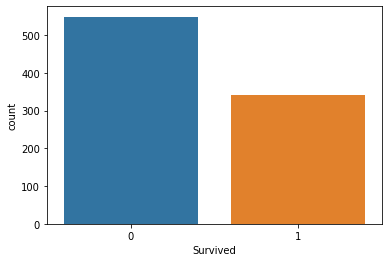

In [68]:
sns.countplot("Survived", data=titanic_dataset)

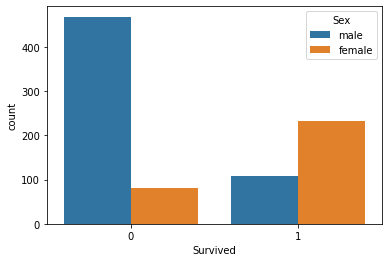

In [69]:
sns.countplot("Survived",hue="Sex", data=titanic_dataset)

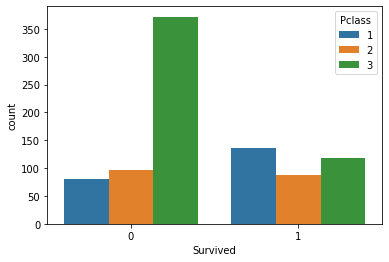

In [70]:
sns.countplot("Survived", hue="Pclass", data=titanic_dataset)

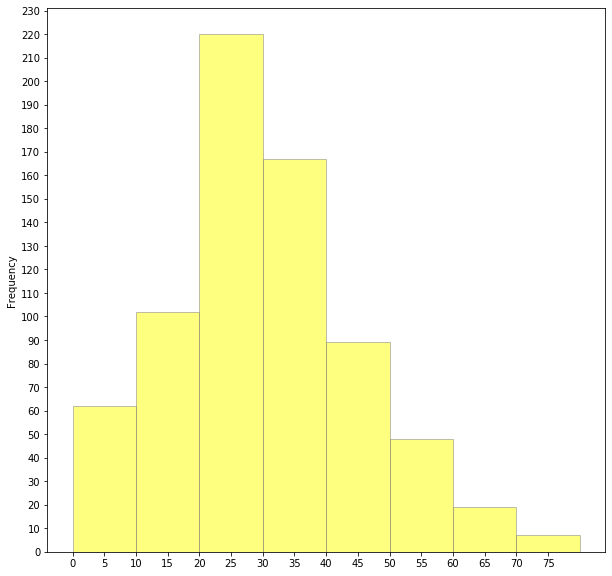

In [71]:
from matplotlib import pyplot as plt
plt.xticks(range(0,80,5))
plt.yticks(range(0,300,10))
titanic_dataset["Age"].plot.hist(bins=[0,10,20,30,40,50,60,70,80], 
                                 figsize=(10,10), alpha=0.5, facecolor="yellow", edgecolor="gray")

In [72]:
len(titanic_dataset[(titanic_dataset["Age"]<70) & (titanic_dataset["Age"] >=60)]["Age"])

19

In [73]:
titanic_dataset.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
age_under_5 = [x for x in titanic_dataset.Age if x<5 and x>=0 ]
print(age_under_5)

[2.0, 4.0, 2.0, 3.0, 4.0, 0.83, 2.0, 1.0, 4.0, 1.0, 1.0, 4.0, 3.0, 2.0, 3.0, 2.0, 0.92, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 4.0, 0.75, 2.0, 2.0, 4.0, 2.0, 0.75, 4.0, 4.0, 0.67, 1.0, 0.42, 2.0, 1.0, 0.83, 4.0, 4.0]


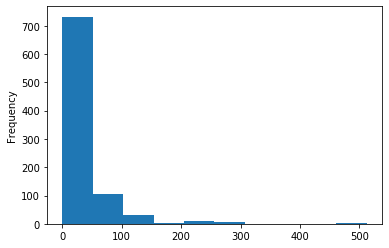

In [74]:
titanic_dataset["Fare"].plot.hist()

In [75]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


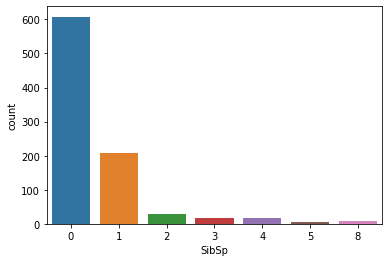

In [76]:
sns.countplot("SibSp", data=titanic_dataset)

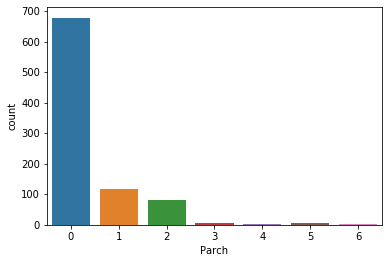

In [77]:
sns.countplot("Parch", data=titanic_dataset)

In [78]:
titanic_dataset.isna().sum() / titanic_dataset.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [79]:
titanic_dataset.drop("Cabin",axis=1,inplace=True)

In [80]:
titanic_dataset["Age"].median()

28.0

In [81]:
titanic_dataset["Age"] = titanic_dataset["Age"].fillna(value=titanic_dataset["Age"].median())

In [82]:
#titanic_dataset["Age"] 
titanic_dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [83]:
titanic_dataset["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [84]:
titanic_dataset["Embarked"] = titanic_dataset["Embarked"].fillna(value=titanic_dataset["Embarked"].mode().values[0])

In [33]:
titanic_dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

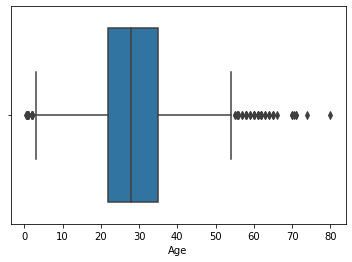

In [85]:
sns.boxplot(titanic_dataset['Age'], data=titanic_dataset)

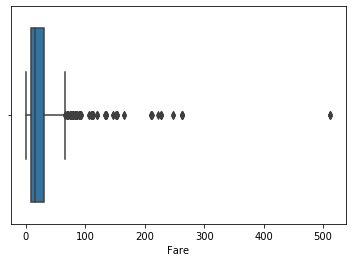

In [86]:
sns.boxplot(titanic_dataset['Fare'], data=titanic_dataset)

In [87]:
Q1= titanic_dataset["Age"].quantile(0.25)
Q3=titanic_dataset["Age"].quantile(0.75)
IQR=Q3-Q1

print('First quartile ',Q1)
print('Third quartile ',Q3)
print('Interquartile range ',IQR)


outliers =titanic_dataset[~((titanic_dataset["Age"] < (Q1 - 1.5 * IQR)) |(titanic_dataset["Age"] > (Q3 + 1.5 * IQR)))]["Age"]
print(outliers)

First quartile  22.0
Third quartile  35.0
Interquartile range  13.0
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 825, dtype: float64


In [88]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [89]:
sex=pd.get_dummies(titanic_dataset["Sex"])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [90]:
embark = pd.get_dummies(titanic_dataset["Embarked"])
embark

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [91]:
pcl = pd.get_dummies(titanic_dataset["Pclass"])
pcl

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [92]:
titanic_dataset = pd.concat([titanic_dataset,sex,embark,pcl], axis=1)
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,0,1,0,0,1


In [93]:
titanic_dataset.drop(["PassengerId", "Name", "Sex", "Pclass", "Ticket", "Embarked"], axis=1, inplace=True)


In [94]:
titanic_dataset.head()

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [95]:
titanic_dataset.to_csv("cleaned_titanic.csv")

In [96]:
X=titanic_dataset.drop(["Survived"], axis=1)
y=titanic_dataset["Survived"]

In [97]:
from sklearn.model_selection import train_test_split


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=444)

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
model = LogisticRegression(max_iter=1000)

In [101]:
X_train

,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
222,51.0,0,0,8.0500,0,1,0,0,1,0,0,1
747,30.0,0,0,13.0000,1,0,0,0,1,0,1,0
700,18.0,1,0,227.5250,1,0,1,0,0,1,0,0
312,26.0,1,1,26.0000,1,0,0,0,1,0,1,0
56,21.0,0,0,10.5000,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
67,19.0,0,0,8.1583,0,1,0,0,1,0,0,1
264,28.0,0,0,7.7500,1,0,0,1,0,0,0,1
791,16.0,0,0,26.0000,0,1,0,0,1,0,1,0
112,22.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [102]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
predictions = model.predict(X_test)

In [105]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       167
           1       0.77      0.74      0.75       101

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(y_test, predictions)

array([[144,  23],
       [ 26,  75]], dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8171641791044776

In [131]:
# Standard scalar



#titanic_dataset.head()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


In [132]:
X_std

array([[-0.56573646,  0.43279337, -0.47367361, ..., -0.56568542,
        -0.51015154,  0.90258736],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.76776695,
        -0.51015154, -1.10792599],
       [-0.25833709, -0.4745452 , -0.47367361, ..., -0.56568542,
        -0.51015154,  0.90258736],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ..., -0.56568542,
        -0.51015154,  0.90258736],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.76776695,
        -0.51015154, -1.10792599],
       [ 0.20276197, -0.4745452 , -0.47367361, ..., -0.56568542,
        -0.51015154,  0.90258736]])

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state=444)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.8208955223880597

In [130]:
titanic_dataset.head()

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [125]:
#df_cont=pd.DataFrame(titanic_dataset,columns=['Age'])

#df_cont['Fare'] = pd.DataFrame(titanic_dataset,columns=['Fare'])

In [126]:
#df_cont

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


In [127]:
#scaler = StandardScaler()
#X_cont_std = scaler.fit_transform(df_cont)

In [129]:
#X_cont_std

array([[-0.56573646, -0.50244517],
       [ 0.66386103,  0.78684529],
       [-0.25833709, -0.48885426],
       ...,
       [-0.1046374 , -0.17626324],
       [-0.25833709, -0.04438104],
       [ 0.20276197, -0.49237783]])

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_cont_std, y, test_size = 0.3, random_state=444)
#model.fit(X_train, y_train)
#predictions = model.predict(X_test)
#accuracy_score(y_test, predictions)

In [151]:
pearsoncorr = titanic_dataset.corr(method='pearson')
pearsoncorr

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
Survived,1.000000,-0.064910,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683,0.285904,0.093349,-0.322308
Age,-0.064910,1.000000,-0.233296,-0.172482,0.096688,-0.081163,0.081163,0.030248,-0.031415,-0.006729,0.323896,0.015831,-0.291955
SibSp,-0.035322,-0.233296,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734,-0.054582,-0.055932,0.092548
Parch,0.081629,-0.172482,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814,-0.017633,-0.000734,0.015790
Fare,0.257307,0.096688,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184,0.591711,-0.118557,-0.413333
female,0.543351,-0.081163,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224,0.098013,0.064746,-0.137143
male,-0.543351,0.081163,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224,-0.098013,-0.064746,0.137143
C,0.168240,0.030248,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742,0.296423,-0.125416,-0.153329
Q,0.003650,-0.031415,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.499421,-0.155342,-0.127301,0.237449
S,-0.149683,-0.006729,0.068734,0.060814,-0.162184,-0.119224,0.119224,-0.782742,-0.499421,1.000000,-0.161921,0.189980,-0.015104


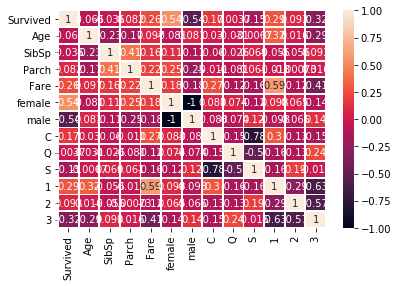

In [152]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            annot=True,
            linewidth=0.8)